# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

O objetivo deste projeto é Criar um modelo clusterização para agrupar os clientes da base de dados.

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

# Gráfico de cotovelo

O gráfico de cotovelo é uma ferramenta utiliza para estimar quantos clusters aproximadamente melhor separam este conjunto de dados.

Carregando os pacotes necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Leitura dos dados

In [2]:
customers_data = pd.read_csv('Wholesale_customers_data.csv')
customers_data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Não há dados nuloe ou incosistências na base de dados podemos dar prosseguimento às próximas etapas.

O dataset não possui valores nulos, porém algumas modificações são necessárias antes de aplicar o método de KMeans.

1º Será necessário normalizar os dados pois como o método de KMeans é baseado em distâncias variáveis com os maiores valores médios teram um peso maior, o que não necessariamente reflete a realidade.

2º As colunas Region e Channel por se tratarem de variáveis categoricas terão de ser discretizadas e forma que o valor da categoria não implique em um peso maior. Por exemplo uma Region do tipo 3 não têm maior peso que a tipo 1 apenas por causa da ordenação numérica. Para evitar isso a coluna Channel será binarizada e serão extraídas as variáveis dummies da coluna Region.

In [5]:
dummies = pd.get_dummies(customers_data['Region'], prefix='Region_')            # Variáveis dummies a partie da coluna Region
customers_data = pd.concat([dummies, customers_data], axis=1)                   # Adicionando as dummies ao DataFrame original
customers_data.drop('Region', axis=1, inplace=True)                             # Removendo a coluna Region que agora é desnecessária
customers_data['Channel'].replace({2:1, 1:0}, inplace=True)                     # Binariando a coluna Channel fazendo com que todos os valores fiquem entre 0 e 1
customers_data_std = StandardScaler().fit_transform(customers_data)             # Normalização dos dados

Aplicando o método do cotovelo

c:\Users\duart\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


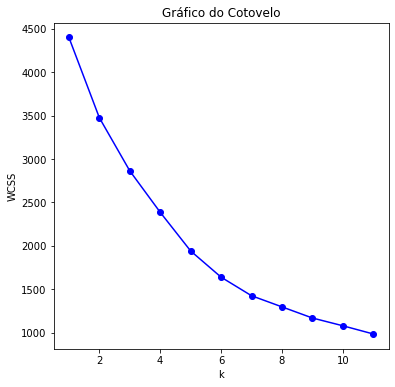

In [6]:
#### VALE 0.5 pontos

WCSS = []

K = range(1, 12)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers_data_std)
    WCSS.append(kmeans.inertia_)


plt.figure(figsize=(6,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Gráfico do Cotovelo')
plt.show()


O Método do Cotovelo sugere um número de Clusters entre 3 e 6. Para confirmar qual a melhor quantidade de clusters será realizado o teste de silhuete score.

In [7]:
print('K-Médias com k = 3')
kmedias_3_pred = KMeans(n_clusters=3).fit_predict(customers_data_std)
print('Silhouete Score: ', silhouette_score(customers_data_std, kmedias_3_pred, metric='euclidean'))

print('K-Médias com k = 4')
kmedias_4_pred = KMeans(n_clusters=4).fit_predict(customers_data_std)
print('Silhouete Score: ', silhouette_score(customers_data_std, kmedias_4_pred, metric='euclidean'))

print('K-Médias com k = 5')
kmedias_5_pred = KMeans(n_clusters=5).fit_predict(customers_data_std)
print('Silhouete Score: ', silhouette_score(customers_data_std, kmedias_5_pred, metric='euclidean'))

print('K-Médias com k = 6')
kmedias_5_pred = KMeans(n_clusters=6).fit_predict(customers_data_std)
print('Silhouete Score: ', silhouette_score(customers_data_std, kmedias_5_pred, metric='euclidean'))

K-Médias com k = 3
Silhouete Score:  0.35592941609653594
K-Médias com k = 4
Silhouete Score:  0.42202746861473966
K-Médias com k = 5
Silhouete Score:  0.42350243976715607
K-Médias com k = 6
Silhouete Score:  0.43232818373995757


O método do cotovelo indica um valor de k entre 3 e 6. Ao realizar-se o teste de Silhoute Score verifica-se que, para este caso, o melhor valor de k é igual a 4. Pois, quanto maior o valor do teste de silhuete score melhor o modelo tende a performar. Embora o k = 6 tenha tido o maior valor de silhoute score ainda sim é preferível o valor de k=4 pois, a diferença do teste com k=6 e k-4 não é grande o suficiente para justificar o aumento da complexidade do modelo.

## Implmentando modelo de clusterização K-Means

Será implementado o modelo de **clusterização K-Means** usando o melhor npumero de clusters informado pelo gráfico de cotovelo e confirmado pelo silhouete score.

In [8]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(customers_data_std)
kmeans_predict = kmeans.predict(customers_data_std)

Adicionan o resultado da clusterização no conjunto de dados original, esta nova variável será chamada de **cluster** e contagem de quantas observações há em cada cluster:

In [9]:
customers_data['cluster'] = kmeans_predict
customers_data['cluster'].value_counts()

0    212
2    109
3     73
1     46
Name: cluster, dtype: int64

In [10]:
print('Total de observações do cluster 1: {}'.format('212'))
print('Total de observações do cluster 2: {}'.format('109'))
print('Total de observações do cluster 3: {}'.format('73'))
print('Total de observações do cluster 3: {}'.format('46'))

Total de observações do cluster 1: 212
Total de observações do cluster 2: 109
Total de observações do cluster 3: 73
Total de observações do cluster 3: 46


# Avaliando os subconjuntos

In [11]:
clusterA = customers_data.loc[customers_data['cluster']==0]
clusterB = customers_data.loc[customers_data['cluster']==1]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [12]:
clusterA.describe()

,Region__1,Region__2,Region__3,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,0.0,0.0,1.0,0.023585,13591.070755,3099.311321,3651.250000,3404.839623,766.858491,1177.353774,0.0
std,0.0,0.0,0.0,0.152111,13219.120046,2739.188875,2948.239487,4319.810733,1041.929789,1395.582795,0.0
min,0.0,0.0,1.0,0.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,0.0,0.0,1.0,0.000000,3793.250000,1179.500000,1667.000000,777.750000,177.750000,378.750000,0.0
50%,0.0,0.0,1.0,0.000000,9635.000000,2251.500000,2645.000000,1740.500000,390.500000,783.000000,0.0
75%,0.0,0.0,1.0,0.000000,18830.250000,3986.500000,4795.250000,4477.500000,948.250000,1521.250000,0.0
max,0.0,0.0,1.0,1.000000,76237.000000,18664.000000,16483.000000,35009.000000,6907.000000,14351.000000,0.0


In [13]:
clusterB.describe()

,Region__1,Region__2,Region__3,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,46.0,46.0,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.0,1.0,0.0,0.391304,9916.434783,5090.521739,7956.000000,4130.456522,2939.326087,1158.500000,1.0
std,0.0,0.0,0.0,0.493435,8478.243698,5890.702032,6602.100316,9234.094315,4061.209908,1062.317901,0.0
min,0.0,1.0,0.0,0.000000,3.000000,333.000000,1330.000000,264.000000,15.000000,51.000000,1.0
25%,0.0,1.0,0.0,0.000000,2684.250000,1402.750000,2767.750000,843.500000,278.750000,535.750000,1.0
50%,0.0,1.0,0.0,0.000000,7839.000000,2354.500000,5723.000000,1460.000000,760.500000,883.000000,1.0
75%,0.0,1.0,0.0,1.000000,15403.250000,6007.750000,11392.250000,3385.000000,4060.500000,1540.750000,1.0
max,0.0,1.0,0.0,1.000000,32717.000000,25071.000000,26839.000000,60869.000000,17120.000000,5609.000000,1.0


A principal diferença entre os clusters A e B está na Região. todos os valores de A estão na Região 3 e no B estão na Região 2 (O Porto). 
É observado ainda que o grupo A têm consumo médio produtos frescos e artesanais maior que o grupo B para os mesmos itens.
Já o grupo B têm cosumo médio maior, em relação ao grupo A, para latícinios, mercearia, congelados e produtos de limpeza.

Neste caso o principal rótulo de idenficação seria a região. O primeiro grupo B seria a região do Porto e o grupo de alguma região fora do Porto ou de Lisboa

A seguir é apresentado o resumo dos outros dois clusters:

In [14]:
customers_data.loc[customers_data['cluster']==2].describe()

,Region__1,Region__2,Region__3,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0
mean,0.036697,0.009174,0.954128,0.963303,10211.963303,12102.220183,17641.816514,2055.110092,7628.302752,2514.422018,2.0
std,0.188886,0.095783,0.210173,0.188886,13262.407705,11133.179607,13244.607244,3946.230603,6812.069836,5061.482645,0.0
min,0.000000,0.000000,0.000000,0.000000,23.000000,1266.000000,4602.000000,33.000000,239.000000,3.000000,2.0
25%,0.000000,0.000000,1.000000,1.000000,2532.000000,6245.000000,9694.000000,398.000000,3837.000000,602.000000,2.0
50%,0.000000,0.000000,1.000000,1.000000,7057.000000,8630.000000,13430.000000,1093.000000,5611.000000,1451.000000,2.0
75%,0.000000,0.000000,1.000000,1.000000,12669.000000,12653.000000,21042.000000,2540.000000,8077.000000,2379.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,2.0


In [15]:
customers_data.loc[customers_data['cluster']==3].describe()

,Region__1,Region__2,Region__3,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,73.0,73.0,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,1.0,0.0,0.0,0.191781,11363.890411,4657.493151,5966.616438,2956.383562,1898.479452,1287.410959,3.0
std,0.0,0.0,0.0,0.396426,11787.286239,4389.567244,5847.660113,3120.760176,2692.337476,1292.021240,0.0
min,1.0,0.0,0.0,0.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,3.0
25%,1.0,0.0,0.0,0.000000,2806.000000,1222.000000,1883.000000,950.000000,263.000000,490.000000,3.0
50%,1.0,0.0,0.0,0.000000,7858.000000,3575.000000,3828.000000,1777.000000,694.000000,797.000000,3.0
75%,1.0,0.0,0.0,0.000000,15603.000000,6602.000000,7041.000000,4260.000000,2894.000000,1693.000000,3.0
max,1.0,0.0,0.0,1.000000,56083.000000,23527.000000,23596.000000,18711.000000,12420.000000,6854.000000,3.0


**Portanto:**

O **Primeiro cluster** corresponde a cliente de regiões fora do Porto e de Lisboa, oriundos na maioria da rede de hotéis/restaurantes/café, com maiores gastos médios em produtos frescos e menores gastos médios em produtos de limpeza.

O **Segundo cluster** corresponde a clientes da região do Porto, na maioria oriundos de hotéis/restaurantes/cafés mas com cerca de 25% oriundos da rede de varejo, com maiores gastos médios em produtos frescos e menor gasto médio em produtos de Delicatesse.

O **Terceiro cluster** corresponde a clientes de regiões fora do Porto ou Lisboa, oriundos da rede de varejo em sua maioria, com maiores gastos médios em produtos de mercearia e menor gasto médio em produtos congelatos.


o **Quarto cluster** corresponde ao clietes da região de Lisboa, oriundos de hotéis/restaurantes/cafés em sua maioria, com maiores gastos médios com produtos frescos e menor gasto médio com produtos de Delicatesse.

# Questões adicionais

1 - Quais são as vantagens e desvantagens do algoritmo K-Médias?

**Vantagens**

* É um algoritimo fácil de implementar e fácil compreensão de sua forma de funcionamento.
* É possível generalizar facilmente os clusters para diferentes formas e tamanhos.
* Adapta-se a novos exemplos.


**Desvantagens**

* É sensível a ouliers
* A escolha do valor de k é por vezes subjetiva e difícil de se determinar manualmente qual seria o melhor valor
* O aumento do número de dimensões aumenta consideravelmente a complexidade do modelo e dificulta sua escalabilidade.

2 - A inicialização dos centroides afeta o algoritmo K-Médias?

Sim a forma como os centroides são inicializados pode afetar o resultado final do algortitmo. Conforme muda-se a posição inicial dos centroides muda-se também os grupamentos finais gerados pelo algoritmo. Deve-se evitar a inicialização de centroides em posições muito próximas entre si ou muito distantes do conjunto de dados. Nos dois casos mencionados o desempenho do algoritmo pode ser reduzido pela escolha inadequada da posição inicial dos centroides. 